In [2]:
# importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# setar configurações
%matplotlib inline
pd.options.display.max_rows = 6000
pd.options.display.max_columns = 999

In [5]:
# carregar o dataframe df_brcities com o arquivo BRAZIL_CITIES.csv
df_brcities = pd.read_csv("../datasets/BRAZIL_CITIES.csv", sep = ";", thousands = ',')

[Text(0, 0.5, 'Quantidade de Cidades'),
 Text(0.5, 0, 'UF'),
 Text(0.5, 1.0, 'Cidades por UF')]

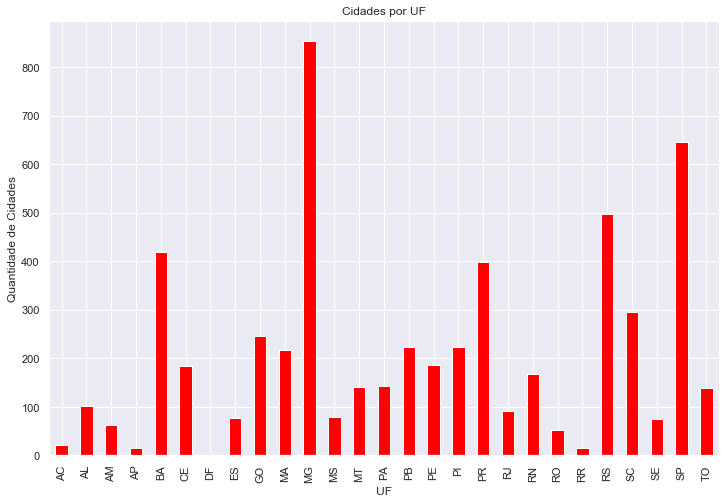

In [40]:
# Agrupar e contar as cidades por Estado, gerando uma Serie
sr_cidadesporestado = df_brcities.groupby(['STATE'])['CITY'].count()

# Grafico de Barras Verticais, contando Cidades por Estado, usando Pandas (Sintaxe 1)
barplot1 = sr_cidadesporestado.plot(kind='bar', color='red', figsize=(12,8))
barplot1.set(xlabel="UF", ylabel="Quantidade de Cidades", title='Cidades por UF')

[Text(0, 0.5, 'Quantidade de Cidades'),
 Text(0.5, 0, 'UF'),
 Text(0.5, 1.0, 'Cidades por UF')]

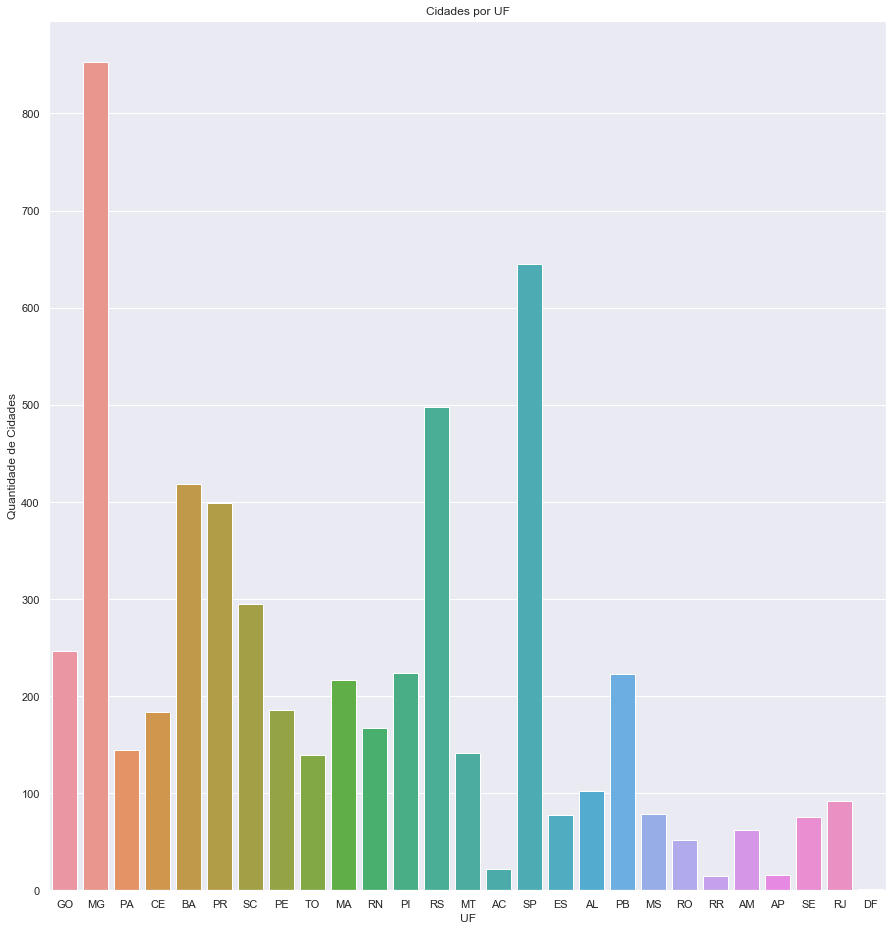

In [49]:
# Grafico de Barras Verticais, contando Cidades por Estado, usando Seaborn com Countplot

# Opcional: Darkgrid
sns.set(style="darkgrid")

plt.figure(figsize=(15,16))
snsbar1 = sns.countplot(data=df_brcities, x='STATE')
snsbar1.set(xlabel='UF', ylabel='Quantidade de Cidades', title='Cidades por UF')

[Text(0, 0.5, 'Quantidade de Cidades'),
 Text(0.5, 0, 'Característica'),
 Text(0.5, 1.0, 'Cidades por Característica')]

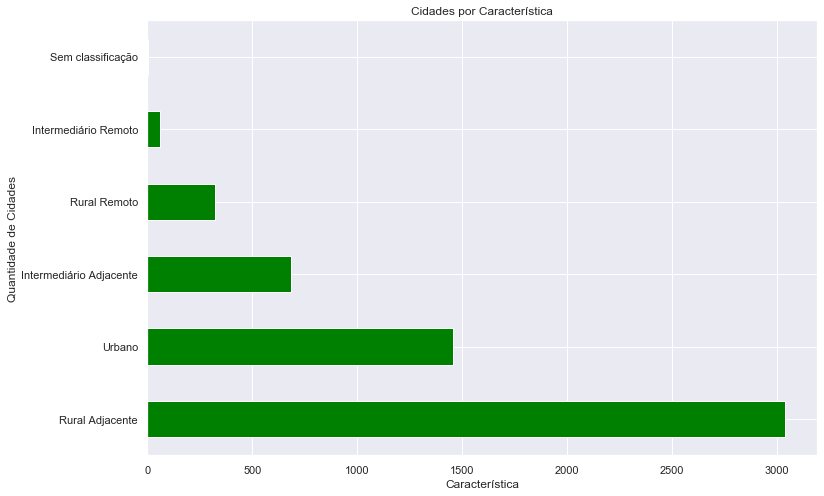

In [72]:
# Gráfico de Barras Horizontais por Característica de Cidade, usando Pandas (Sintaxe 2)
barplot2 = df_brcities.RURAL_URBAN.value_counts().plot(kind='barh', color='green', figsize=(12,8))
barplot2.set(xlabel="Característica", ylabel="Quantidade de Cidades", title='Cidades por Característica')

[Text(0, 0.5, 'Quantidade de Cidades'),
 Text(0.5, 0, 'Característica'),
 Text(0.5, 1.0, 'Cidades por Característica')]

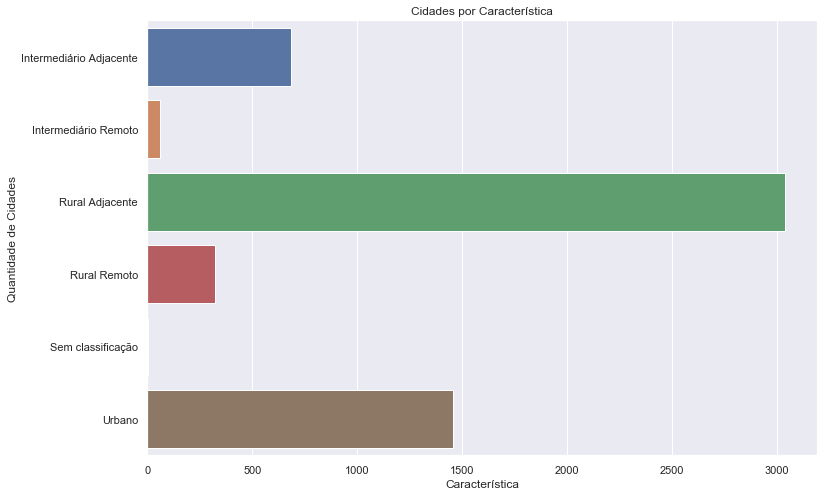

In [76]:
# Gráfico de Barras Horizontais por Característica de Cidade, usando Seaborn

# Agrupar e contar as cidades por RURAL_URBAN, gerando uma Serie
sr_cidadesporcaract = df_brcities.groupby(['RURAL_URBAN'])['CITY'].count()
df_cidadesporcaract = sr_cidadesporcaract.to_frame()

plt.figure(figsize=(12,8))
snsbar2 = sns.barplot(data = df_cidadesporcaract.reset_index(), x = 'CITY', y = 'RURAL_URBAN')
snsbar2.set(xlabel="Característica", ylabel="Quantidade de Cidades", title='Cidades por Característica')

[Text(0, 0.5, 'Média'),
 Text(0.5, 0, 'UF'),
 Text(0.5, 1.0, 'Média IDHM - Região Sul')]

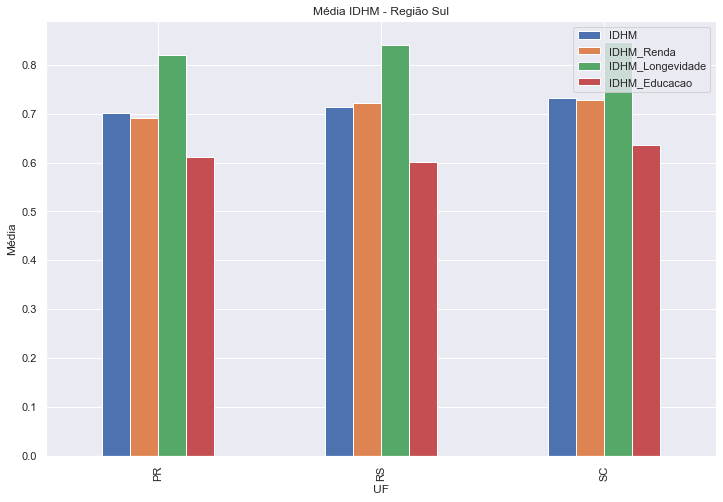

In [88]:
# Agrupar e tirar a média de IDHM, IDHM_Renda, IDHM_Longevidade, IDHM_Educacao por Estado (Região Sul), gerando um Dataframe
df_idhm = df_brcities[(df_brcities['STATE'] == 'PR') | (df_brcities['STATE'] == 'SC') | (df_brcities['STATE'] == 'RS')].groupby(['STATE'])['IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao'].mean()

# Gráfico de Barras Verticais com mais de uma Serie = Média de IDHM, IDHM_Renda, IDHM_Longevidade, IDHM_Educacao) - Usando Pandas
barplot3 = df_idhm.plot(kind='bar', figsize=(12,8))
barplot3.set(xlabel="UF", ylabel="Média", title='Média IDHM - Região Sul')

[Text(0, 0.5, 'Média'),
 Text(0.5, 0, 'UF'),
 Text(0.5, 1.0, 'Média IDHM - Região Sul')]

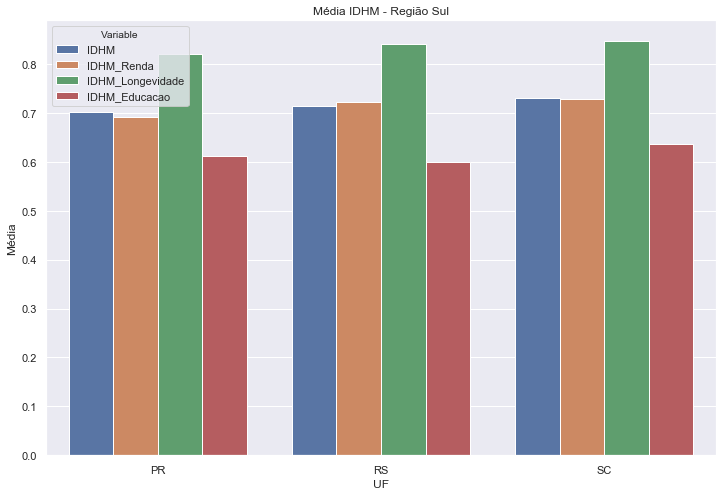

In [95]:
# Gráfico de Barras Verticais com mais de uma Serie = Média de IDHM, IDHM_Renda, IDHM_Longevidade, IDHM_Educacao) - Usando Seaborn

# Fazer Reshape do Dataframe para o Seaborn
df_idhm = df_idhm.reset_index()
df_idhm_reshaped = df_idhm.melt(id_vars='STATE').rename(columns=str.title)

plt.figure(figsize=(12,8))
snsbar3 = sns.barplot(x='State', y='Value', hue='Variable', data=df_idhm_reshaped)
snsbar3.set(xlabel="UF", ylabel="Média", title='Média IDHM - Região Sul')

[Text(0, 0.5, 'Quantidade Cidades'),
 Text(0.5, 0, 'GDP per capita'),
 Text(0.5, 1.0, 'Indice GDP per Capita')]

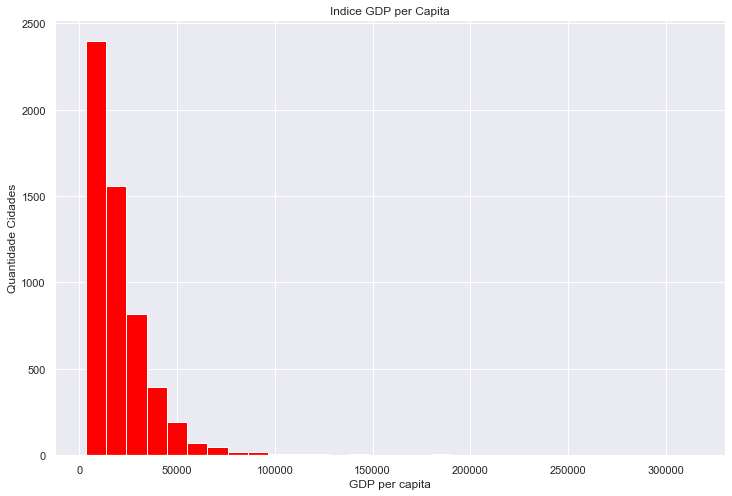

In [109]:
# Histograma da variável GDP_CAPITA - Usando Pandas

# Preencher valores nulos com média
df_brcities['GDP_CAPITA'].fillna(df_brcities['GDP_CAPITA'].mean(), inplace = True)

histplot1 = df_brcities['GDP_CAPITA'].hist(color='red', bins=30, figsize=(12,8))
histplot1.set(xlabel="GDP per capita", ylabel="Quantidade Cidades", title='Indice GDP per Capita')

[Text(0, 0.5, 'Quantidade Cidades'),
 Text(0.5, 0, 'GDP per capita'),
 Text(0.5, 1.0, 'Indice GDP per Capita')]

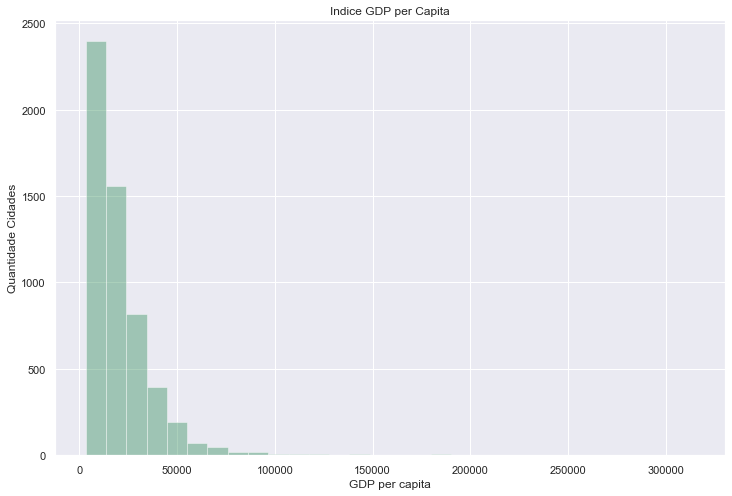

In [112]:
# Histograma por GDP_CAPITA - Usando Seaborn

plt.figure(figsize=(12,8))

snsdist1 = sns.distplot(df_brcities.GDP_CAPITA, color="seagreen", bins=30, hist=True, kde=False)
snsdist1.set(xlabel="GDP per capita", ylabel="Quantidade Cidades", title='Indice GDP per Capita')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Text(0, 0.5, 'PIB per capita'),
 Text(0.5, 0, 'IDHM'),
 Text(0.5, 1.0, 'Relação entre IDHM e PIB per Capita')]

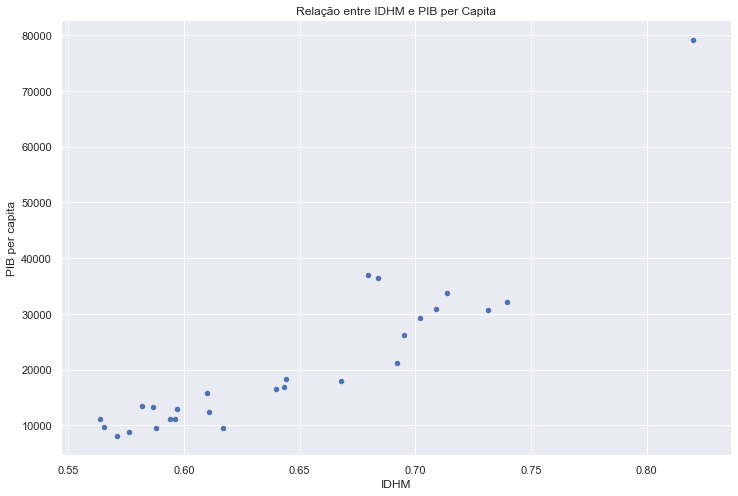

In [120]:
# Gráfico de Dispersão (Scatterplot) entre as variáveis IDHM e GDP_CAPITA (PIB per capita), usando Pandas

df_idhm_pib = df_brcities.groupby(['STATE'])['IDHM', 'GDP_CAPITA'].mean()

scatplot1 = df_idhm_pib.plot.scatter(x="IDHM", y="GDP_CAPITA", figsize=(12,8))
scatplot1.set(xlabel="IDHM", ylabel="PIB per capita", title='Relação entre IDHM e PIB per Capita')

[Text(0, 0.5, 'PIB per capita'),
 Text(0.5, 0, 'IDHM'),
 Text(0.5, 1.0, 'Relação entre IDHM e PIB per Capita')]

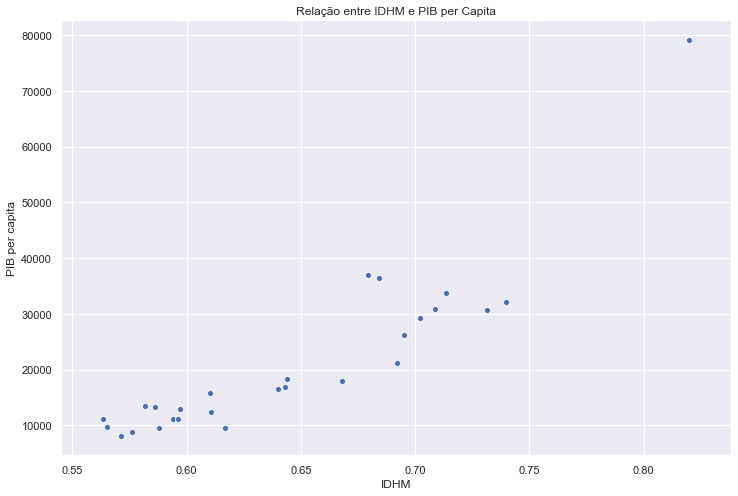

In [123]:
# Gráfico de Dispersão (Scatterplot) entre as variáveis IDHM e GDP_CAPITA (PIB per capita), usando Seaborn

plt.figure(figsize=(12,8))
snsscat1 = sns.scatterplot(data=df_idhm_pib, x="IDHM", y="GDP_CAPITA")
snsscat1.set(xlabel="IDHM", ylabel="PIB per capita", title='Relação entre IDHM e PIB per Capita')

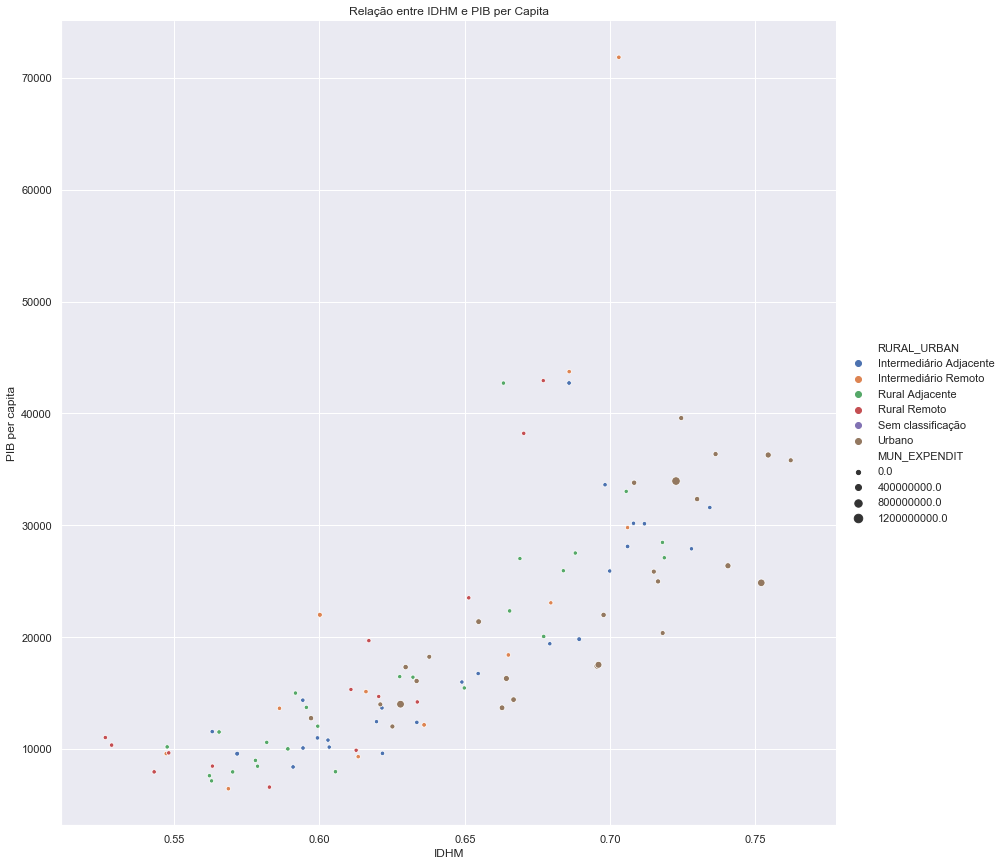

In [181]:
# Gráfico de Dispersão (Scatterplot) entre as variáveis IDHM, GDP_CAPITA (PIB per capita) e Gastos Municipais, usando Pandas

df_idhm_pib_comp = df_brcities.groupby(['RURAL_URBAN', 'STATE'])['IDHM', 'GDP_CAPITA', 'MUN_EXPENDIT'].mean()

df_idhm_pib_comp = df_idhm_pib_comp.reset_index()

snsscat2 = sns.relplot(data=df_idhm_pib_comp, x="IDHM", y="GDP_CAPITA", size='MUN_EXPENDIT', hue = 'RURAL_URBAN', height=12)
snsscat2.set(xlabel="IDHM", ylabel="PIB per capita", title='Relação entre IDHM e PIB per Capita')

[Text(0, 0, 'IDHM'),
 Text(0, 0, 'IDHM_Renda'),
 Text(0, 0, 'IDHM_Longevidade'),
 Text(0, 0, 'IDHM_Educacao')]

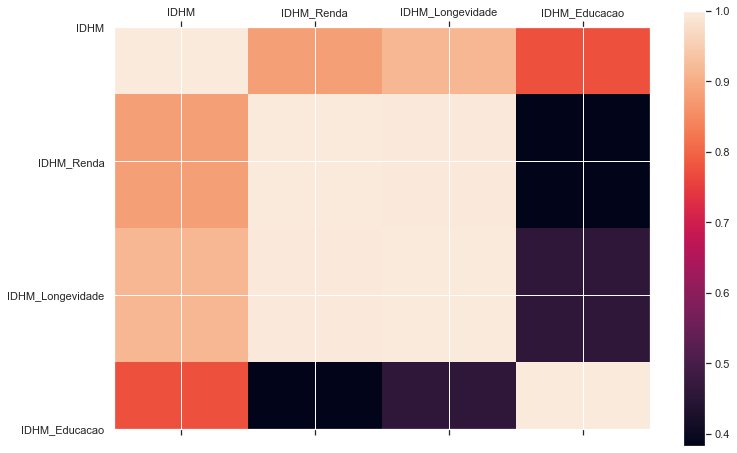

In [203]:
# Matrix de Correlação entre as variáveis de IDHM, usando Pandas e Matplotlib

# Cria a matriz de correlação
corr = df_idhm.corr()

# Parametros do Grafico
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Cria Labels pra apresentar
labels = [c for c in corr.columns]  # traz nome das colunas

# Visualiza, com barra de cores
corrplot1 = ax.matshow(corr)
fig.colorbar(corrplot1)

ax.set_xticks(np.arange(len(labels)))  
ax.set_yticks(np.arange(len(labels)))  
ax.set_xticklabels(labels)  
ax.set_yticklabels(labels)

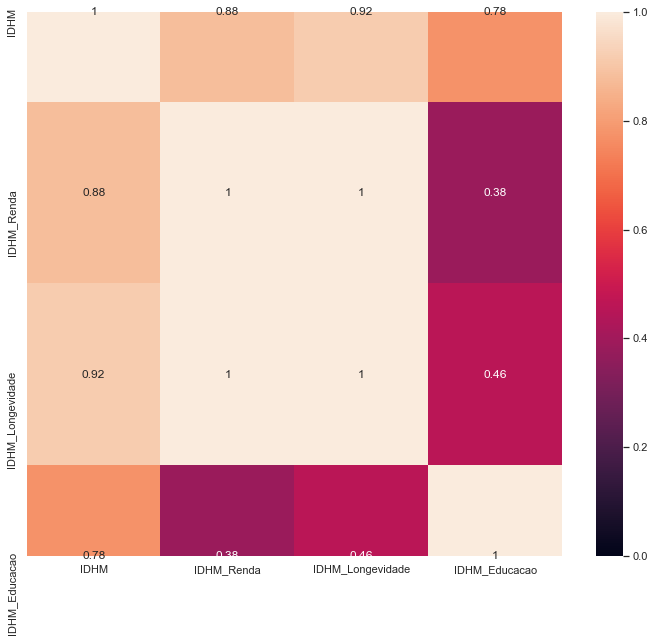

In [192]:
# Matrix de Correlação entre as variáveis de IDHM, usando Seaborn

plt.figure(figsize=(12,10))
snscorr1 = sns.heatmap(corr, annot=True, vmin=0, vmax=1)

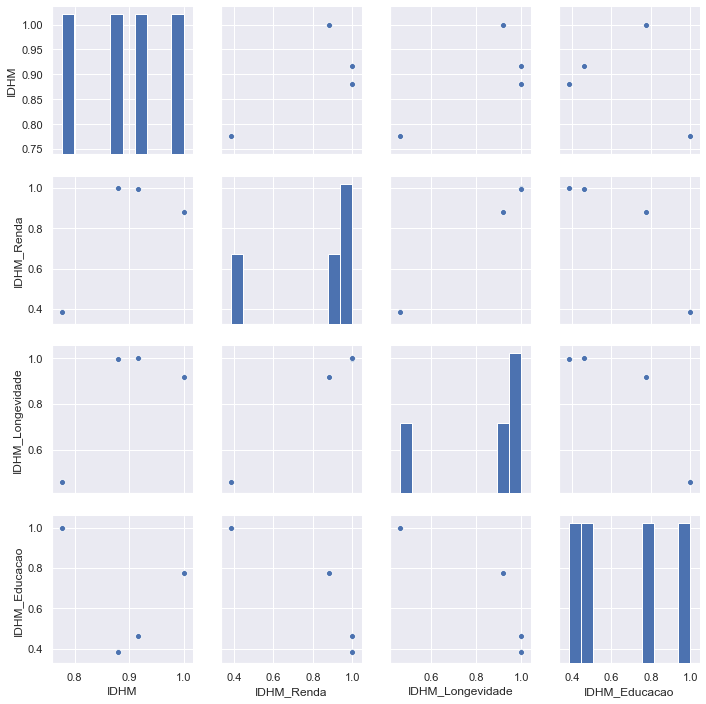

In [214]:
# Matrix de Correlação (Pairplot) entre as variáveis de IDHM, usando Seaborn

sns.pairplot(corr)

[Text(0, 0.5, 'Índice'),
 Text(0.5, 0, 'Variáveis'),
 Text(0.5, 1.0, 'Boxplot IDHM')]

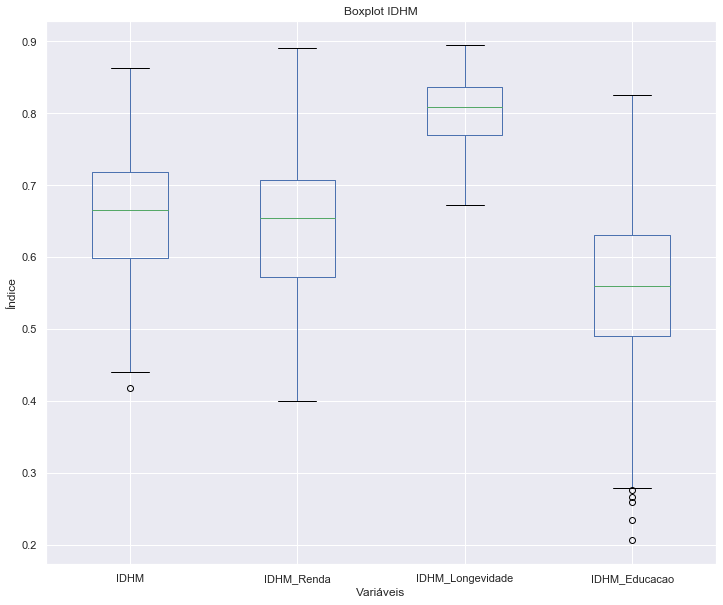

In [204]:
# Boxplot das variáveis IDHM, usando Pandas
plt.figure(figsize=(12,10))
boxplot1 = df_brcities.boxplot(column=['IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao'])
boxplot1.set(xlabel="Variáveis", ylabel="Índice", title='Boxplot IDHM')

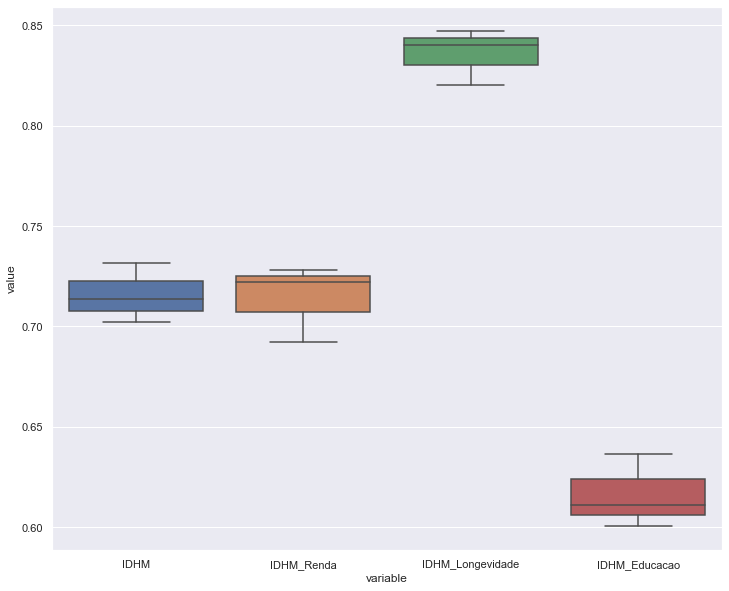

In [215]:
# Boxplot das variáveis IDHM, usando Seaborn
plt.figure(figsize=(12,10))
snsbox1 = sns.boxplot(data=pd.melt(df_idhm[['IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao']]), x = 'variable', y = 'value')

[Text(0, 0.5, 'Índice'),
 Text(0.5, 0, 'UF'),
 Text(0.5, 1.0, 'Boxplot IDHM por UF')]

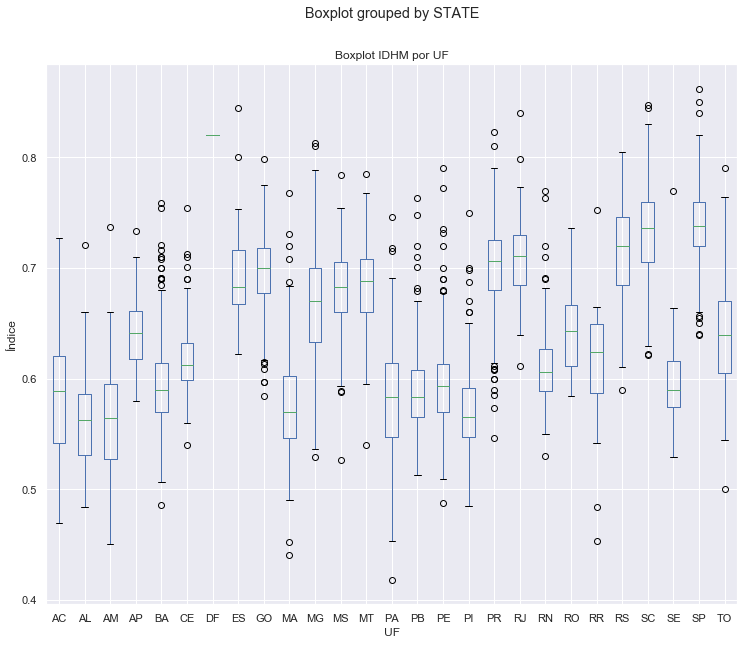

In [220]:
# Boxplot da variável IDHM com UF como Categorias, usando Pandas
boxplot2 = df_brcities.boxplot(column=['IDHM'], by='STATE', figsize=(12,10))
boxplot2.set(xlabel="UF", ylabel="Índice", title='Boxplot IDHM por UF')

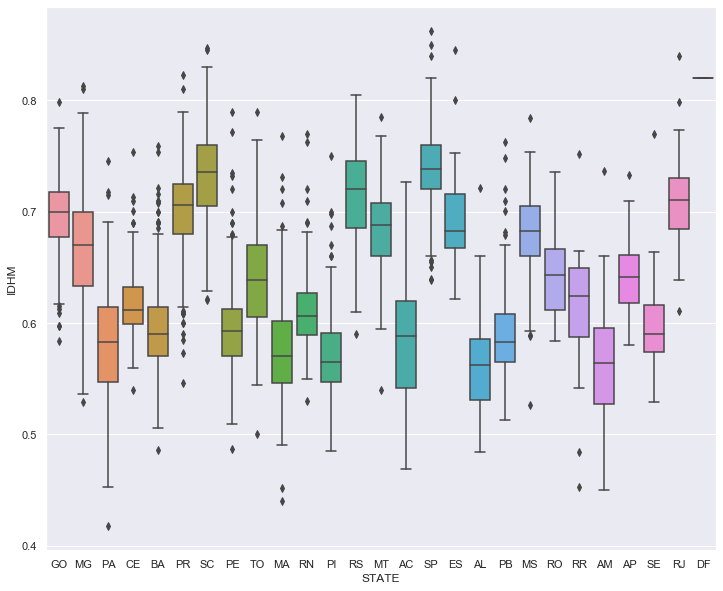

In [208]:
# Boxplot da variável IDHM com UF como Categorias, usando Seaborn
plt.figure(figsize=(12,10))
snsbox2 = sns.boxplot(data=df_brcities, x = 'STATE', y = 'IDHM')

[Text(0, 0.5, 'Índice'),
 Text(0.5, 0, 'Variáveis'),
 Text(0.5, 1.0, 'Boxplot IDHM')]

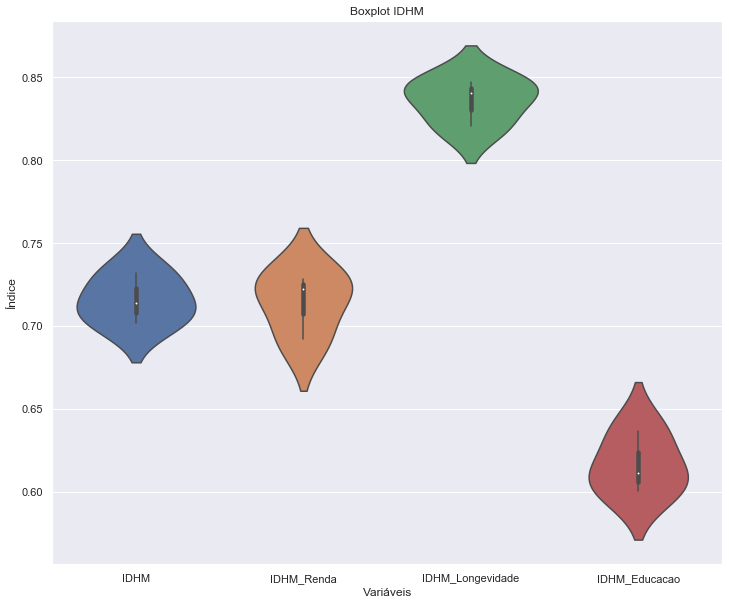

In [228]:
# Violinplot das variáveis IDHM, usando Seaborn
plt.figure(figsize=(12,10))
snsviol1 = sns.violinplot(data=pd.melt(df_idhm[['IDHM', 'IDHM_Renda', 'IDHM_Longevidade', 'IDHM_Educacao']]), x = 'variable', y = 'value')
snsviol1.set(xlabel="Variáveis", ylabel="Índice", title='Boxplot IDHM')

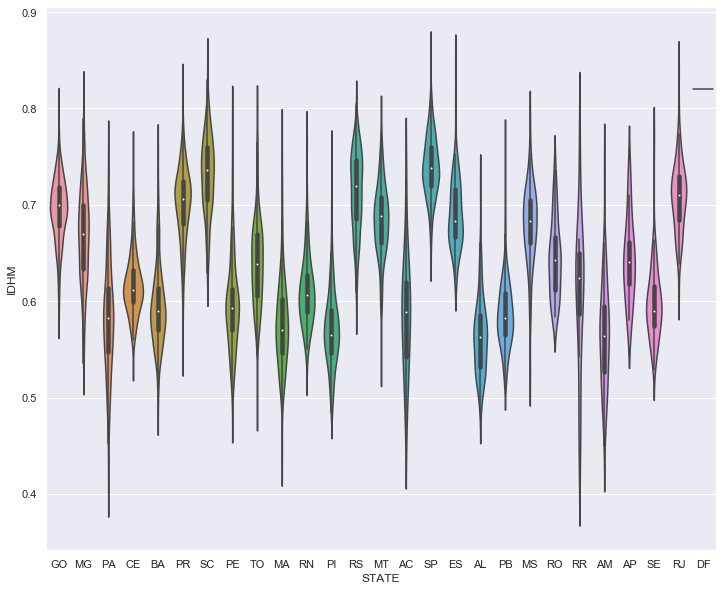

In [230]:
# Violinplot da variável IDHM com UF como Categorias, usando Seaborn
plt.figure(figsize=(12,10))
snsviol2 = sns.violinplot(data=df_brcities, x = 'STATE', y = 'IDHM')